In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('Data/train.csv')
test = pd.read_csv('Data/test.csv')

According to the documentation of the AI4I 2020 Predictive Maintenance Dataset

- Type: consisting of a letter L, M, or H for low, medium and high as product quality variants.
- air temperature [K]: generated using a random walk process later normalized to a standard deviation of 2 K around 300 K.
- process temperature [K]: generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.
- rotational speed [rpm]: calculated from a power of 2860 W, overlaid with a normally distributed noise.
- torque [Nm]: torque values are normally distributed around 40 Nm with a Ïƒ = 10 Nm and no negative values.
- tool wear [min]: The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process.
- machine failure: whether the machine has failed in this particular datapoint for any of the following failure modes are true.

The machine failure consists of five independent failure modes

- tool wear failure (TWF): the tool will be replaced of fail at a randomly selected tool wear time between 200 ~ 240 mins.
- heat dissipation failure (HDF): heat dissipation causes a process failure, if the difference between air and process temperature is below 8.6 K and the rotational speed is below 1380 rpm.
- power failure (PWF): the product of torque and rotational speed (in rad/s) equals the power required for the process. If this power is below 3500 W or above 9000 W, the process fails.
- overstrain failure (OSF): if the product of tool wear and torque exceeds 11,000 minNm for the L product variant (12,000 M, 13,000 H), the process fails due to overstrain.
- random failures (RNF): each process has a chance of 0,1 % to fail regardless of its process parameters.

If at least one of the above failure modes is true, the process fails and the 'machine failure' label is set to 1.

In [3]:
train

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136424,136424,M22284,M,300.1,311.4,1530,37.5,210,0,0,0,0,0,0
136425,136425,H38017,H,297.5,308.5,1447,49.1,2,0,0,0,0,0,0
136426,136426,L54690,L,300.5,311.8,1524,38.5,214,0,0,0,0,0,0
136427,136427,L53876,L,301.7,310.9,1447,46.3,42,0,0,0,0,0,0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [5]:
test

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90949,227378,L51130,L,302.3,311.4,1484,40.4,15,0,0,0,0,0
90950,227379,L47783,L,297.9,309.8,1542,33.8,31,0,0,0,0,0
90951,227380,L48097,L,295.6,306.2,1501,41.4,187,0,0,0,0,0
90952,227381,L48969,L,298.1,307.8,1534,40.3,69,0,0,0,0,0


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90954 entries, 0 to 90953
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       90954 non-null  int64  
 1   Product ID               90954 non-null  object 
 2   Type                     90954 non-null  object 
 3   Air temperature [K]      90954 non-null  float64
 4   Process temperature [K]  90954 non-null  float64
 5   Rotational speed [rpm]   90954 non-null  int64  
 6   Torque [Nm]              90954 non-null  float64
 7   Tool wear [min]          90954 non-null  int64  
 8   TWF                      90954 non-null  int64  
 9   HDF                      90954 non-null  int64  
 10  PWF                      90954 non-null  int64  
 11  OSF                      90954 non-null  int64  
 12  RNF                      90954 non-null  int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 9.0+ MB


In [7]:
target_col = 'Machine failure'

num_cols = [
    'Air temperature [K]',
    'Process temperature [K]',
    'Rotational speed [rpm]',
    'Torque [Nm]',
    'Tool wear [min]'
]

binary_cols = [
    'TWF',
    'HDF',
    'PWF',
    'OSF',
    'RNF'
]

cat_cols = 'Type'
cat_columns = ['Type']

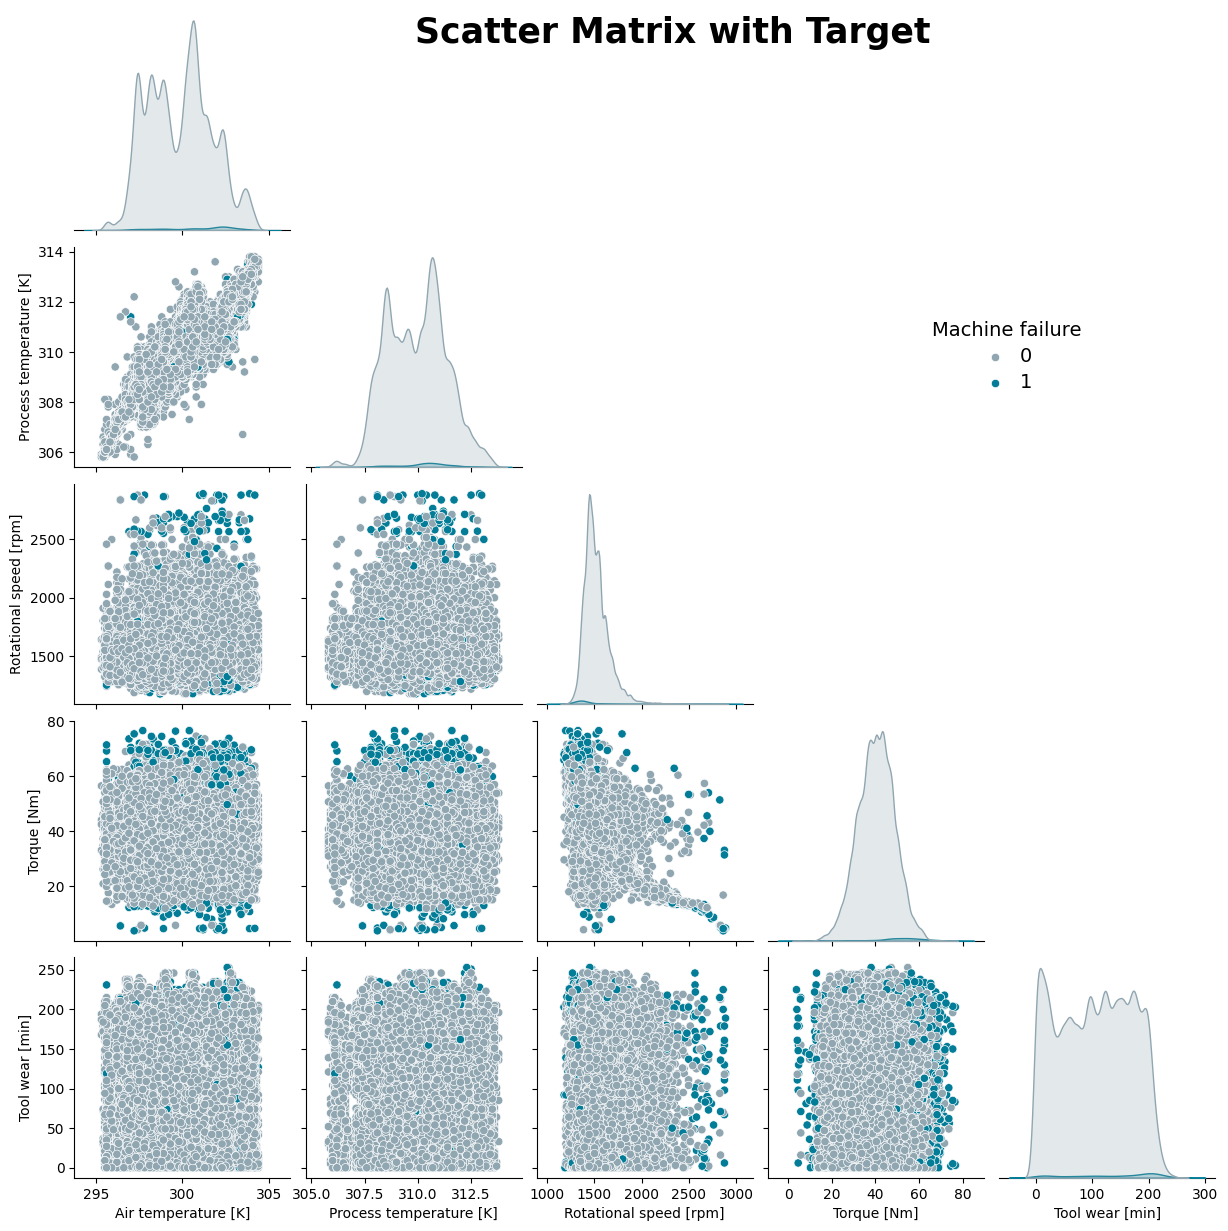

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

c = ['#90A6B1', '#037d97']

g = sns.pairplot(data=train, x_vars=num_cols, y_vars=num_cols, hue=target_col, corner=True, palette=c)

g._legend.set_bbox_to_anchor((0.8, 0.7))
g._legend.set_title(target_col)
g._legend.loc = 'upper center'
g._legend.get_title().set_fontsize(14)
for item in g._legend.get_texts():
    item.set_fontsize(14)

plt.suptitle(f'Scatter Matrix with Target\n\n', ha='center', fontweight='bold', fontsize=25, y=0.98)
plt.show()

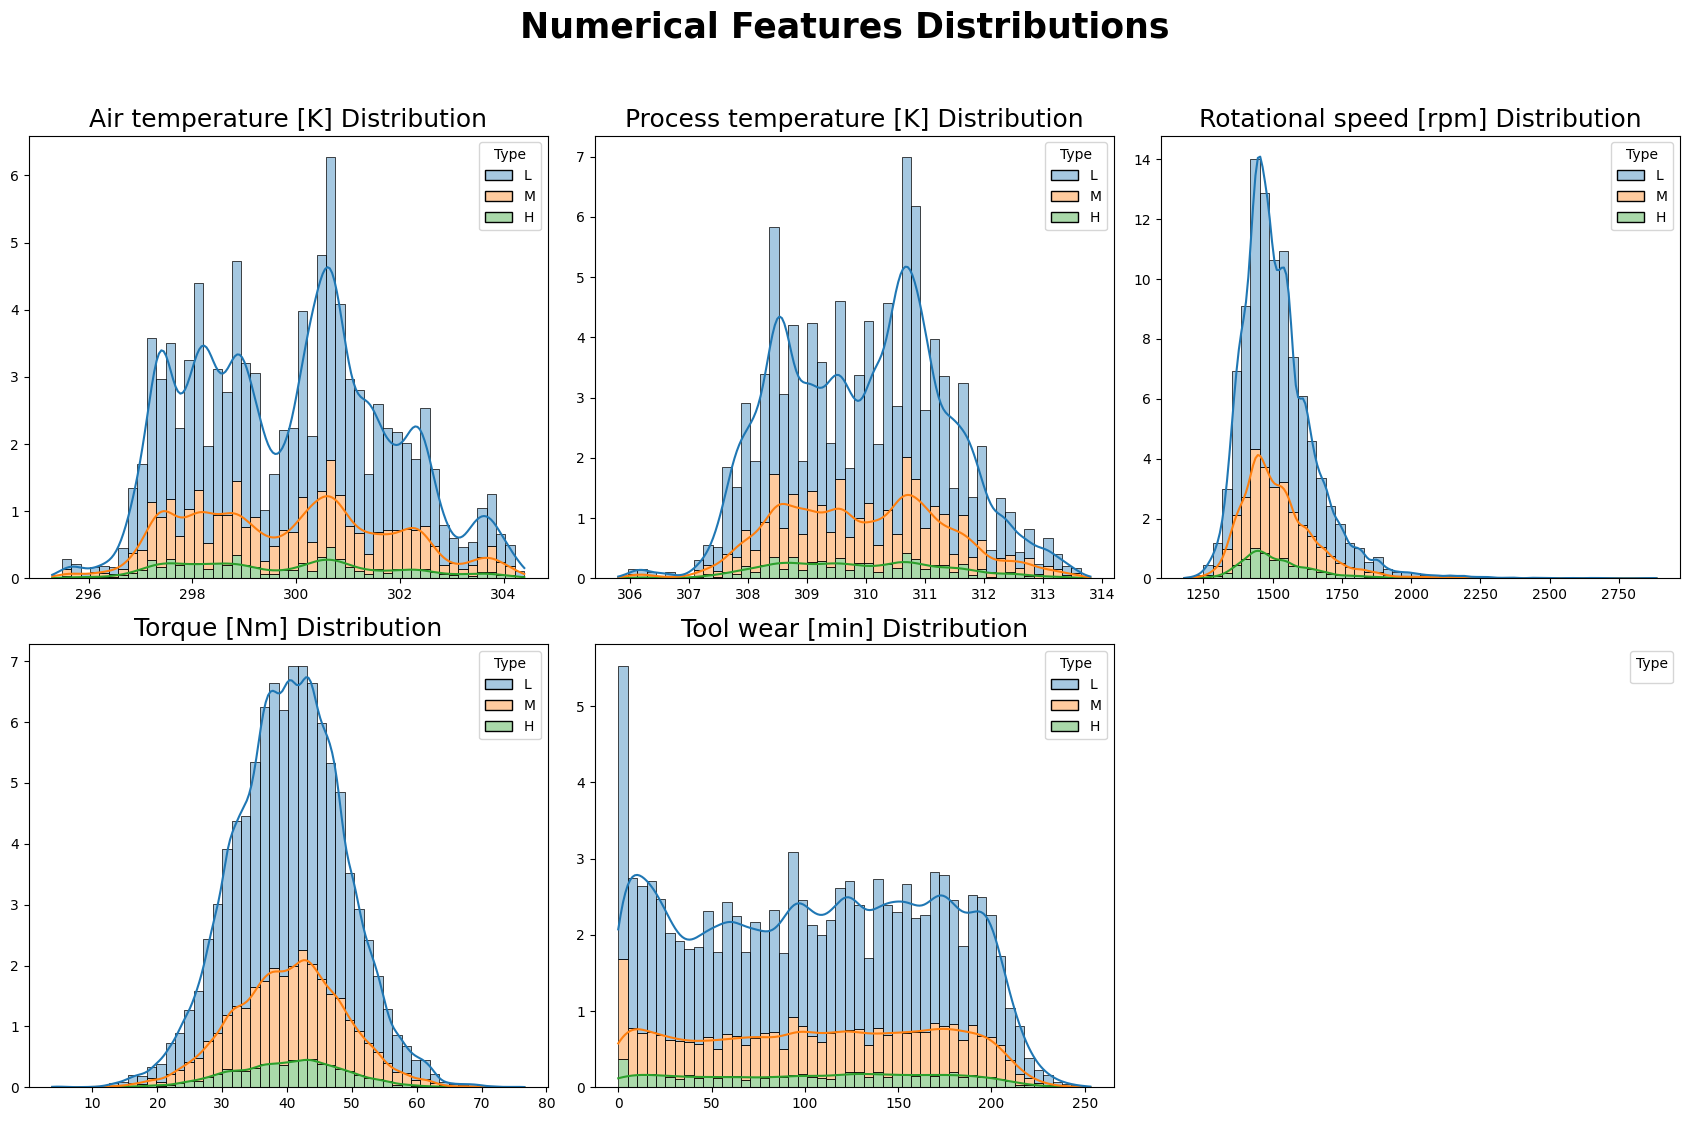

In [9]:
import math

palette = ['#302c36', '#037d97', '#E4591E', '#C09741',
           '#EC5B6D', '#90A6B1', '#6ca957', '#D8E3E2']

features = [f for f in train.columns if f in num_cols]
n_bins = 50
histplot_hyperparams = {
    'kde': True,
    'alpha': 0.4,
    'stat': 'percent',
    'bins': n_bins
}

columns = features
n_cols = 3
n_rows = math.ceil(len(columns) / n_cols)
fig, ax = plt.subplots(n_rows, n_cols, figsize=(17, 12))
ax = ax.flatten()

for i, column in enumerate(columns):
    plot_axes = [ax[i]]

    sns.histplot(
        train,
        x=column,
        hue=cat_cols,
        multiple="stack",
        ax=ax[i],
        color=palette[1],
        **histplot_hyperparams
    )
        
    for artist in plot_axes[0].artists:
        if isinstance(artist, sns.kdeplot):
            artist.remove()

    # titles
    ax[i].set_title(f'{column} Distribution', fontsize=18)
    ax[i].set_xlabel(None, fontsize=16)  
    ax[i].set_ylabel(None, fontsize=16)
    
handles, labels = ax[0].get_legend_handles_labels()
plt.legend(handles, labels, title=cat_cols)

for i in range(i + 1, len(ax)):
    ax[i].axis('off')

fig.suptitle(f'Numerical Features Distributions\n\n\n', ha='center', fontweight='bold', fontsize=25, y=0.93)
plt.tight_layout()
plt.show()

In [10]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [39]:
train = pd.read_csv('Data/train.csv')
test = pd.read_csv('Data/test.csv')

In [40]:
train.columns = [col.replace('[', '').replace(']', '').replace('<', '') if col not in ['Type'] else col for col in train.columns]
test.columns = [col.replace('[', '').replace(']', '').replace('<', '') if col not in ['Type'] else col for col in test.columns]
train.columns

Index(['id', 'Product ID', 'Type', 'Air temperature K',
       'Process temperature K', 'Rotational speed rpm', 'Torque Nm',
       'Tool wear min', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

In [41]:
test.columns

Index(['id', 'Product ID', 'Type', 'Air temperature K',
       'Process temperature K', 'Rotational speed rpm', 'Torque Nm',
       'Tool wear min', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

In [42]:
# Statistical Aggregations
train['TorqueMean'] = train.groupby('Product ID')['Torque Nm'].transform('mean')
train['ToolWearMax'] = train.groupby('Product ID')['Tool wear min'].transform('max')

# Time Series Features (Lagged Values)
train['TorqueLag1'] = train.groupby('Product ID')['Torque Nm'].shift(1)
train['ToolWearLag1'] = train.groupby('Product ID')['Tool wear min'].shift(1)

# Ratio Features
train['TorqueToSpeedRatio'] = train['Torque Nm'] / train['Rotational speed rpm']
train['TempRatio'] = train['Air temperature K'] / train['Process temperature K']

# Rolling Window Statistics
train['TorqueRollingMean'] = train.groupby('Product ID')['Torque Nm'].rolling(window=3, min_periods=1).mean().reset_index(level=0, drop=True)

In [43]:
# Statistical Aggregations
test['TorqueMean'] = test.groupby('Product ID')['Torque Nm'].transform('mean')
test['ToolWearMax'] = test.groupby('Product ID')['Tool wear min'].transform('max')

# Time Series Features (Lagged Values)
test['TorqueLag1'] = test.groupby('Product ID')['Torque Nm'].shift(1)
test['ToolWearLag1'] = test.groupby('Product ID')['Tool wear min'].shift(1)

# Ratio Features
test['TorqueToSpeedRatio'] = test['Torque Nm'] / test['Rotational speed rpm']
test['TempRatio'] = test['Air temperature K'] / test['Process temperature K']

# Rolling Window Statistics
test['TorqueRollingMean'] = test.groupby('Product ID')['Torque Nm'].rolling(window=3, min_periods=1).mean().reset_index(level=0, drop=True)

In [44]:
df_s= pd.get_dummies(train['Type'])
train= train.drop('Type', axis =1)
train = pd.concat([train, df_s], axis =1)
# Separate the features (X) and the target variable (y)
y = train['Machine failure']
X = train.drop(['id', 'Product ID', 'Machine failure'], axis=1)

# Split the data into training set and validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
import xgboost as xgb

# Hyperparameter Tuning
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
    
}


# Initialize the XGBoost regressor
model = xgb.XGBRegressor(objective='reg:logistic')

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters: ", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Validate the model
y_pred = best_model.predict(X_val)

Best Hyperparameters:  {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 300}


In [46]:
test

,id,Product ID,Type,Air temperature K,Process temperature K,Rotational speed rpm,Torque Nm,Tool wear min,TWF,HDF,PWF,OSF,RNF,TorqueMean,ToolWearMax,TorqueLag1,ToolWearLag1,TorqueToSpeedRatio,TempRatio,TorqueRollingMean
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0,35.050000,192,NaN,NaN,0.025350,0.970465,38.000000
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0,36.986667,183,NaN,NaN,0.016813,0.970096,28.800000
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0,40.300000,197,NaN,NaN,0.024721,0.970683,37.700000
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0,35.871429,152,NaN,NaN,0.032184,0.969315,47.600000
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0,38.847222,195,NaN,NaN,0.027261,0.971502,41.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90949,227378,L51130,L,302.3,311.4,1484,40.4,15,0,0,0,0,0,37.185714,176,37.2,15.0,0.027224,0.970777,40.266667
90950,227379,L47783,L,297.9,309.8,1542,33.8,31,0,0,0,0,0,49.589655,156,47.3,104.0,0.021920,0.961588,39.433333
90951,227380,L48097,L,295.6,306.2,1501,41.4,187,0,0,0,0,0,44.500000,197,51.0,139.0,0.027582,0.965382,47.866667
90952,227381,L48969,L,298.1,307.8,1534,40.3,69,0,0,0,0,0,51.800000,143,67.3,20.0,0.026271,0.968486,58.300000


In [47]:
df_s_t= pd.get_dummies(test['Type'])
test= test.drop('Type', axis =1)
test = pd.concat([test, df_s_t], axis =1)
new_X = test.drop(['id', 'Product ID'], axis=1)
probabilities = best_model.predict(new_X)# Probability of machine failure

print(probabilities)

[0.00109343 0.00482401 0.00048838 ... 0.00040886 0.01353205 0.00480381]


In [48]:
sub = pd.read_csv('Data/sample_submission.csv')
sub

,id,Machine failure
0,136429,0.5
1,136430,0.5
2,136431,0.5
3,136432,0.5
4,136433,0.5
...,...,...
90949,227378,0.5
90950,227379,0.5
90951,227380,0.5
90952,227381,0.5


In [49]:
sub['Machine failure'] = probabilities
sub

,id,Machine failure
0,136429,0.001093
1,136430,0.004824
2,136431,0.000488
3,136432,0.000599
4,136433,0.000551
...,...,...
90949,227378,0.001715
90950,227379,0.000280
90951,227380,0.000409
90952,227381,0.013532


In [50]:
sub.to_csv('submission.csv', index = False )